<a href="https://colab.research.google.com/github/TitusChoi/AI/blob/master/Concept/CNN/CNN(TF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN(TF).ipynb
Description   : Convolution neural network<br>

## 1. 기존 신경망
Fashion MNIST tensorflow 기본 데이터를 활용했다.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

print(len(train_X), len(test_X))

4423680/4422102 [==============================] - 0s 0us/step
60000 10000


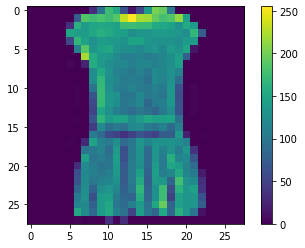

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [3]:
# 이미지 정보 시각화
import matplotlib.pyplot as plt
plt.imshow(train_X[3])
plt.colorbar()
plt.show()
print(train_X[0])

In [4]:
# 데이터 정규화(Normalization)
train_X = train_X / 255.0
test_X = test_X / 255.0
print(train_X[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [5]:
# keras 활용 훈련
model = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape = (28, 28)),
          tf.keras.layers.Dense(units = 128, activation = 'relu'),
          tf.keras.layers.Dense(units = 10, activation = 'softmax')                             
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(train_X, train_Y,
            epochs = 500,
            validation_split = 0.25,
            callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_loss')]
          )

Epoch 1/500
1407/1407 [==============================] - 8s 4ms/step - loss: 0.6630 - accuracy: 0.7745 - val_loss: 0.4253 - val_accuracy: 0.8447
Epoch 2/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3997 - accuracy: 0.8594 - val_loss: 0.3909 - val_accuracy: 0.8556
Epoch 3/500
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3534 - accuracy: 0.8715 - val_loss: 0.3771 - val_accuracy: 0.8615
Epoch 4/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3209 - accuracy: 0.8827 - val_loss: 0.3425 - val_accuracy: 0.8731
Epoch 5/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.3043 - accuracy: 0.8889 - val_loss: 0.3384 - val_accuracy: 0.8769
Epoch 6/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2934 - accuracy: 0.8922 - val_loss: 0.3307 - val_accuracy: 0.8833
Epoch 7/500
1407/1407 [==============================] - 5s 3ms/step - loss: 0.2678 - accuracy: 0.9020 - val_loss: 0.3283 - val_ac

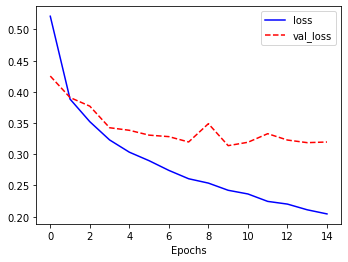

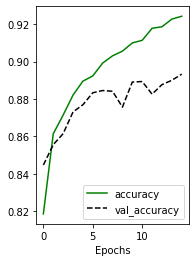

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [8]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 2ms/step - loss: 0.3508 - accuracy: 0.8826


[0.3507600724697113, 0.8826000094413757]

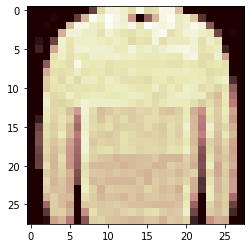

신경망의 예측 확률 분포 
 [[1.0344813 1.0003909 1.9356747 1.        1.0276662 1.        1.0017815
  1.        1.0000055 1.       ]]

 예측 범주 : 2 실제 범주 : 2 -> 일치 여부 True


In [9]:
import numpy as np

# 예측 수정
pred_X = model.predict(test_X[[20]])

# 예측 이미지 확인
plt.imshow(test_X[20], cmap = 'pink')
plt.show()

# 예측 결과 확인
pred_X_argmax = np.argmax(pred_X)
correct = np.equal(pred_X_argmax, test_Y[20])

print('신경망의 예측 확률 분포 \n {}'.format(pred_X + 1))
print('\n 예측 범주 : {} 실제 범주 : {} -> 일치 여부 {}'.format(pred_X_argmax, test_Y[20], correct))

## 2. 합성 신경망
Fashion MNIST tensorflow 기본 데이터를 활용했다.

In [10]:
print(train_X.shape, test_X.shape)
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


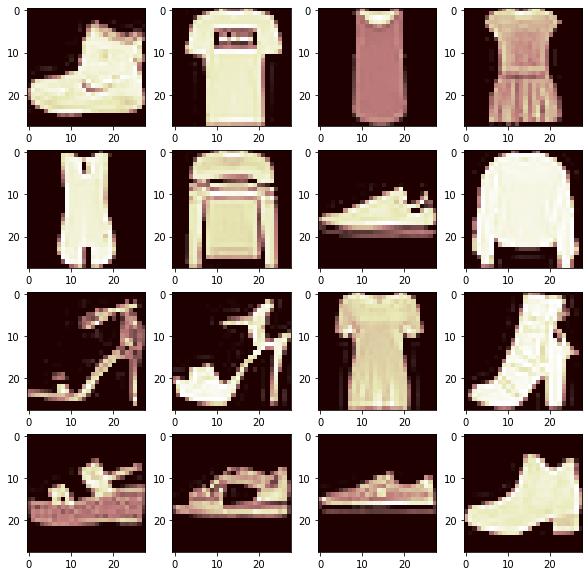

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


(28, 28, 1)

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(train_X[i].reshape(28, 28), cmap = 'pink')

plt.show()
print(train_Y[:16])

train_X[0].shape

### 2.1. 합성곱 계층만 사용
풀링 레이어 없이, 단순 합성공 계층만 사용해본다.<br>
tf.keras.layers.Conv2D()<br>
- input_shape : 입력 이미지 크기 및 채널
- kernel_size : 커널 사이즈
- filters : 몇 개의 필터를 생성할 지
- strides : 건너뛰기
- padding : 패딩 방식

tf.keras.layers.Flatten() : 다차원 레이어를 1차원으로 펼쳐준다.


In [12]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3,3), filters = 16, strides = (1, 1), padding = 'valid'),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters=32),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters=64),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 128, activation='relu'),
                             tf.keras.layers.Dense(units = 10, activation='softmax')
])

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2=0.999, epsilon=1e-07),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
____________________________________________

In [14]:
history = model.fit(train_X, train_Y, epochs = 500, validation_split=0.25, callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, monitor = 'val_loss')])

Epoch 1/500
1407/1407 [==============================] - 41s 10ms/step - loss: 0.5750 - accuracy: 0.7967 - val_loss: 0.3878 - val_accuracy: 0.8586
Epoch 2/500
1407/1407 [==============================] - 13s 9ms/step - loss: 0.3406 - accuracy: 0.8748 - val_loss: 0.3549 - val_accuracy: 0.8734
Epoch 3/500
1407/1407 [==============================] - 13s 10ms/step - loss: 0.2742 - accuracy: 0.8971 - val_loss: 0.3983 - val_accuracy: 0.8663
Epoch 4/500
1407/1407 [==============================] - 14s 10ms/step - loss: 0.2314 - accuracy: 0.9133 - val_loss: 0.4100 - val_accuracy: 0.8611
Epoch 5/500
1407/1407 [==============================] - 13s 10ms/step - loss: 0.1875 - accuracy: 0.9298 - val_loss: 0.4013 - val_accuracy: 0.8717
Epoch 6/500
1407/1407 [==============================] - 14s 10ms/step - loss: 0.1694 - accuracy: 0.9387 - val_loss: 0.4768 - val_accuracy: 0.8702
Epoch 7/500
1407/1407 [==============================] - 14s 10ms/step - loss: 0.1483 - accuracy: 0.9447 - val_loss: 0.

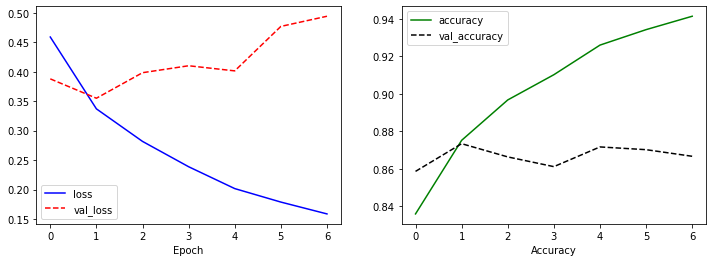

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Accuracy')
plt.legend()

plt.show()

In [16]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 4ms/step - loss: 0.4905 - accuracy: 0.8635


[0.4904867112636566, 0.8634999990463257]

### 2.2. 합성곱, 풀링, 드랍아웃 사용
최대치 풀링, 평균치 풀링을 사용해본다.<br>
- 최대치 풀링 : tf.keras.layer.MaxPool2d()
  - strides : 건너뛰기
  - pool size : 풀링 사이즈 설정 - 기본값은 (2, 2)

- 평균치 풀링 : tf.keras.layer.AveragePool2d()
- 드랍아웃 계층 생성 : tf.keras.layers.Dropout()
  - rate : 이전 계층에서 제외할 뉴런의 비율 설정

In [20]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3,3), filters = 32),
                             tf.keras.layers.MaxPool2D(strides=(2, 2), pool_size=(2, 2)),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters=64),
                             tf.keras.layers.AvgPool2D(strides=(2, 2)),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters=128),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 128, activation='relu'),
                             tf.keras.layers.Dropout(rate = 0.3),
                             tf.keras.layers.Dense(units = 10, activation='softmax')
])

In [21]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2=0.999, epsilon=1e-07),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
average_pooling2d (AveragePo (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [22]:
history = model.fit(train_X, train_Y, epochs = 500, validation_split=0.25, callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, monitor = 'val_loss')])

Epoch 1/500
1407/1407 [==============================] - 11s 7ms/step - loss: 0.7330 - accuracy: 0.7356 - val_loss: 0.4150 - val_accuracy: 0.8492
Epoch 2/500
1407/1407 [==============================] - 10s 7ms/step - loss: 0.4077 - accuracy: 0.8529 - val_loss: 0.3532 - val_accuracy: 0.8701
Epoch 3/500
1407/1407 [==============================] - 9s 7ms/step - loss: 0.3585 - accuracy: 0.8702 - val_loss: 0.3417 - val_accuracy: 0.8731
Epoch 4/500
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3401 - accuracy: 0.8762 - val_loss: 0.3445 - val_accuracy: 0.8767
Epoch 5/500
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3237 - accuracy: 0.8840 - val_loss: 0.3111 - val_accuracy: 0.8881
Epoch 6/500
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3031 - accuracy: 0.8900 - val_loss: 0.3110 - val_accuracy: 0.8897
Epoch 7/500
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2950 - accuracy: 0.8915 - val_loss: 0.3295 - 

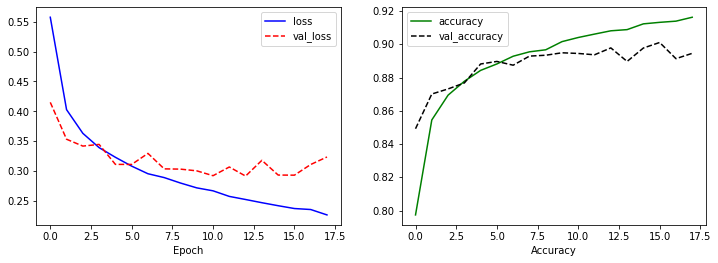

In [23]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Accuracy')
plt.legend()

plt.show()

In [24]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 4ms/step - loss: 0.3395 - accuracy: 0.8917


[0.3394834101200104, 0.891700029373169]

### 2.3. VGGNet 스타일 적용
Style Transfer 논문에서 VGGNet을 활용했다.<br>
실제 이를 적용해볼 경우 92%라는 정확도를 보인다.

- VGGNet 스타일을 적용함(아래와 같은 방식으로 쌓음)
  - 합성곱 계층 2개 적용 / 풀링 레이어 삽입
  - 합성곱 계층 2개 적용 / 풀링 레이어 삽입
  - 완전 연결 계층 적용
  - 완전 연결 계층 적용
  - 완전 연결 계층 적용

참고논문 :<br>[VGGNet](https://arxiv.org/pdf/1709.01921.pdf), [Style Transfer](https://arxiv.org/pdf/1508.06576.pdf)

In [25]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3,3), filters = 32, padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3,3), filters = 64, padding = 'same', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 128, padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 256, padding = 'valid', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 512, activation='relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 256, activation='relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 10, activation='softmax')
])

In [26]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2=0.999, epsilon=1e-07),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 256)        

In [27]:
history = model.fit(train_X, train_Y, epochs = 500, validation_split=0.25, callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, monitor = 'val_loss')])

Epoch 1/500
1407/1407 [==============================] - 27s 18ms/step - loss: 0.8668 - accuracy: 0.6845 - val_loss: 0.3465 - val_accuracy: 0.8692
Epoch 2/500
1407/1407 [==============================] - 25s 18ms/step - loss: 0.4001 - accuracy: 0.8576 - val_loss: 0.2864 - val_accuracy: 0.8908
Epoch 3/500
1407/1407 [==============================] - 25s 18ms/step - loss: 0.3438 - accuracy: 0.8739 - val_loss: 0.2641 - val_accuracy: 0.9037
Epoch 4/500
1407/1407 [==============================] - 25s 18ms/step - loss: 0.3205 - accuracy: 0.8843 - val_loss: 0.2382 - val_accuracy: 0.9124
Epoch 5/500
1407/1407 [==============================] - 25s 18ms/step - loss: 0.2942 - accuracy: 0.8946 - val_loss: 0.2491 - val_accuracy: 0.9104
Epoch 6/500
1407/1407 [==============================] - 25s 18ms/step - loss: 0.2731 - accuracy: 0.9005 - val_loss: 0.2346 - val_accuracy: 0.9156
Epoch 7/500
1407/1407 [==============================] - 25s 18ms/step - loss: 0.2688 - accuracy: 0.9034 - val_loss: 0

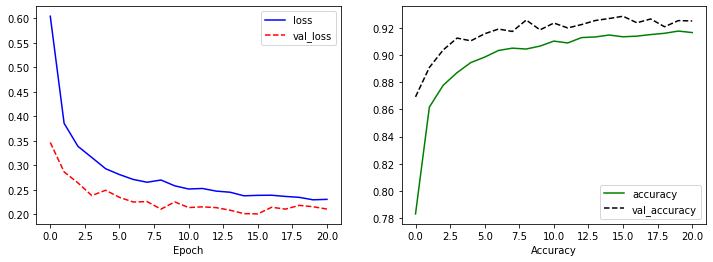

In [28]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Accuracy')
plt.legend()

plt.show()

In [29]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 2s 7ms/step - loss: 0.2237 - accuracy: 0.9202


[0.2236585021018982, 0.920199990272522]

### 2.4. VGGNet 스타일 적용 + 이미지 보강
위에서 적용했던 VGGNet과 이미지 보강을 합쳐 성능을 더욱 향상시켜보기로 한다.<br>
이미지 추가 생성 함수 목록이다.
- rotation_range : 이미지 회전값
- zoom_range : 이미지 일부 확대
- shear_range : 이미지 기울기
- width_shift_range : 좌우이동
- height_shift_range : 상하이동
- horizontal_flip : 이미지 가로 뒤집기
- vertical_flip : 이미지 세로 뒤집기

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

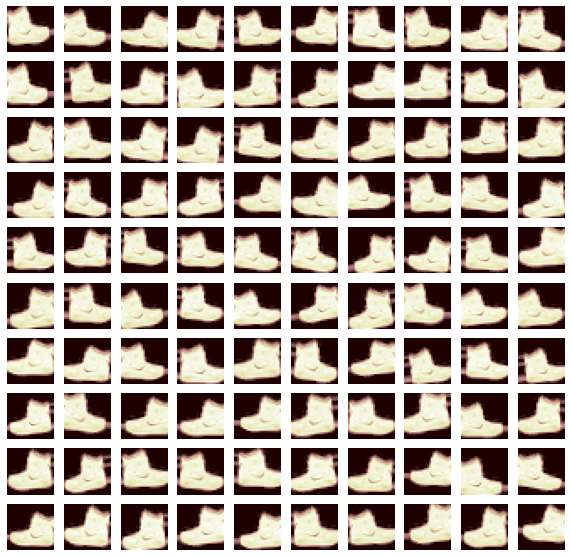

In [32]:
# 이미지 생성 연습을 위한 보강 조건
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False
)

# 한번에 생성할 이미지 수
argument_size = 100

# flow()를 통해 실제 보강 이미지 생성
x_argument = image_generator.flow(x = np.tile(A = train_X[0].reshape(28 * 28), reps = 100).reshape(-1, 28, 28, 1),
                                  y = np.zeros(argument_size),
                                  batch_size = argument_size,
                                  shuffle = False).next()[0]

# 실제 이미지 보강이 이뤄졌는지 확인
plt.figure(figsize = (10, 10))
for i in range(100):
  plt.subplot(10, 10, i + 1)
  plt.axis('off')
  plt.imshow(x_argument[i].reshape(28, 28), cmap='pink')
plt.show()

In [34]:
# 이미지 보강 조건
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False
)

# 한번에 생성할 이미지 수
argument_size = 30000

# 원본 이미지 무작위 선택
x_choice = np.random.choice(train_X.shape[0], size = argument_size, replace = False)
x_argumented = train_X[x_choice].copy()
y_argumented = train_Y[x_choice].copy()

# flow()를 통해 실제 보강 이미지 생성
x_argumented = image_generator.flow(x_argumented,
                                  np.zeros(argument_size),
                                  batch_size = argument_size,
                                  shuffle = False).next()[0]

# 보강 됐는지 확인
print(x_argumented.shape)

(30000, 28, 28, 1)


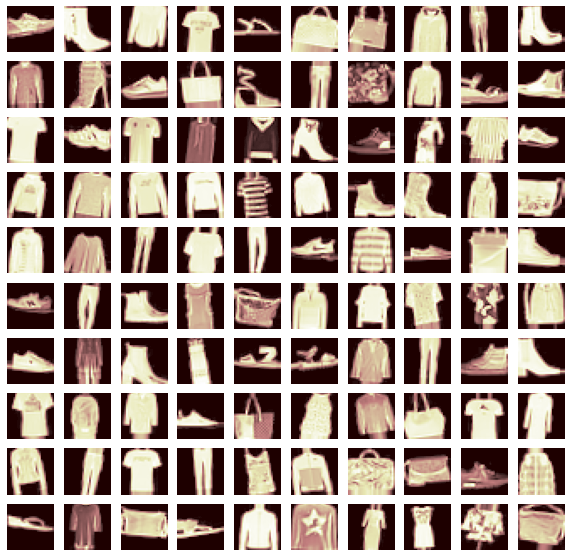

(90000, 28, 28, 1)


In [35]:
# 보강 이미지 확인
plt.figure(figsize=(10, 10))
for i in range(100):
  plt.subplot(10, 10, i + 1)
  plt.axis('off')
  plt.imshow(x_argumented[i].reshape(28, 28), cmap='pink')
plt.show()

# 데이터 concat 메서드로 합쳐주기
train_X = np.concatenate((train_X, x_argumented))
train_Y = np.concatenate((train_Y, y_argumented))

# 보강 데이터 결합 확인
print(train_X.shape)

In [36]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3,3), filters = 32, padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3,3), filters = 64, padding = 'same', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 128, padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(kernel_size = (3,3), filters = 256, padding = 'valid', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 512, activation='relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 256, activation='relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 10, activation='softmax')
])

In [37]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001, beta_1 = 0.9, beta_2=0.999, epsilon=1e-07),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 256)        

In [38]:
history = model.fit(train_X, train_Y, epochs = 500, validation_split=0.25, callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, monitor = 'val_loss')])

Epoch 1/500
2110/2110 [==============================] - 40s 18ms/step - loss: 0.8211 - accuracy: 0.6967 - val_loss: 0.5879 - val_accuracy: 0.7810
Epoch 2/500
2110/2110 [==============================] - 37s 18ms/step - loss: 0.3808 - accuracy: 0.8632 - val_loss: 0.4946 - val_accuracy: 0.8199
Epoch 3/500
2110/2110 [==============================] - 38s 18ms/step - loss: 0.3421 - accuracy: 0.8773 - val_loss: 0.4394 - val_accuracy: 0.8412
Epoch 4/500
2110/2110 [==============================] - 37s 18ms/step - loss: 0.3157 - accuracy: 0.8857 - val_loss: 0.4448 - val_accuracy: 0.8356
Epoch 5/500
2110/2110 [==============================] - 37s 18ms/step - loss: 0.3038 - accuracy: 0.8907 - val_loss: 0.4282 - val_accuracy: 0.8399
Epoch 6/500
2110/2110 [==============================] - 37s 18ms/step - loss: 0.2959 - accuracy: 0.8928 - val_loss: 0.4072 - val_accuracy: 0.8503
Epoch 7/500
2110/2110 [==============================] - 37s 17ms/step - loss: 0.2863 - accuracy: 0.8970 - val_loss: 0

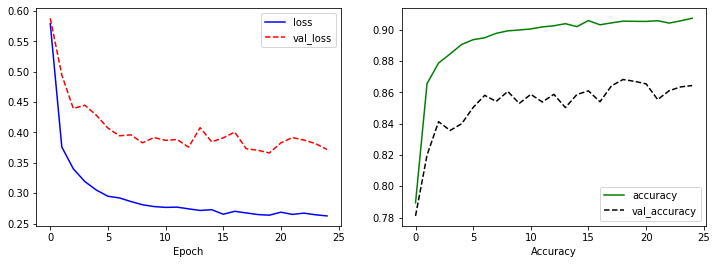

In [39]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Accuracy')
plt.legend()

plt.show()

In [40]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 2s 7ms/step - loss: 0.2172 - accuracy: 0.9216


[0.21719340980052948, 0.9215999841690063]